Estos datos están sacados de la empresa donde trabajo (Dawer Brokers SRL). 
La empresa es un broker de seguros que se dedica a la venta de seguros y la verificación de siniestros. Yo soy empleado del área de sistemas y me dedico al desarrollo de aplicaciones de seguros. Cuando les pedí a mis jefes un dataset para analizar, estuvieron más que contentos de dármelo (junto con mil pedidos de cosas que ellos querían averiguar).

En particular, este dataset corresponde a una de las exportaciones (resumen de información relevante de las ventas) del seguro FIELPET, un seguro de mascotas que cubre gastos veterinarios. El dataset contiene información de las ventas de los últimos 5 años, tiene 10466 registros y 45 variables.


In [1]:
mascotas <- read.csv("ExpoMascotas.csv", header = TRUE, sep = ";")

In [2]:
dim(mascotas)

[1] 10466    45

In [3]:
summary(mascotas)

       Id             Cia             Certificado         Poliza       
 Min.   : 58595   Length:10466       Min.   :131199   Min.   :2156307  
 1st Qu.:106854   Class :character   1st Qu.:174674   1st Qu.:2446545  
 Median :116190   Mode  :character   Median :195270   Median :2583973  
 Mean   :125305                      Mean   :189955   Mean   :2546312  
 3rd Qu.:144313                      3rd Qu.:206553   3rd Qu.:2656980  
 Max.   :179591                      Max.   :297929   Max.   :2731977  
                                     NA's   :358      NA's   :358      
    Fecha              Ciclo             Agencia             Local          
 Length:10466       Length:10466       Length:10466       Length:10466      
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                       

Bajo la idea de que "entra basura, sale basura", hay que hacer un tratamiento de los datos porque vienen con un poco de basura (lo sé porque fui yo el que programó esto).

In [4]:
colnames(mascotas)

[1] "Id"                         "Cia"                       
 [3] "Certificado"                "Poliza"                    
 [5] "Fecha"                      "Ciclo"                     
 [7] "Agencia"                    "Local"                     
 [9] "Provincia"                  "Localidad"                 
[11] "Vendedor"                   "Cod.Vend"                  
[13] "Estado"                     "Cliente.Apellido"          
[15] "Cliente.Nombre"             "Sexo"                      
[17] "Tipo.y.Nro.Doc."            "Fecha.Nacimiento"          
[19] "Campania"                   "Producto"                  
[21] "Importe"                    "Medio.Pago"                
[23] "Nro.Pago"                   "Vto."                      
[25] "Cargado.por"                "Motivo"                    
[27] "Observaciones"              "Email"                     
[29] "Telefono.en.solicitud"      "Celular.en.solicitud"      
[31] "Celular"                    "Imei"                      
[33] "Tipo.Mascota"               "Mascota.Fec.Nac"           
[35] "Nombre.Mascota"             "Raza.Mascota"              
[37] "Sexo.Mascota"               "Observacion.anterior"      
[39] "Monto.Deuda"                "Cuotas.Adeudadas"          
[41] "Poliza.Anterior"            "Ultimo.estado"             
[43] "Ultimo.motivo"              "Ultima.observacion"        
[45] "Ultima.fecha.cambio.estado"

La columna principal de clasificación es Estado. Estas representan los estados de la solicitud. También podemos considerar que otra clasifiación es la de Medio.Pago (que representa el medio de pago de la venta). Finalmente, Raza.Mascota debería ser otra clasificación, pero ya voy a explicar qué le pasa.

Vamos a eliminar las siguientes columnas porque no contienen información relevante para el análisis: 'Cia','Certificado','Poliza,'Ciclo','Local','Cod.Vend','Cliente.Apellido''Cliente.Nombre', 'Tipo.y.Nro.Doc.','Nro.Pago''Vto.','Cargado.por','Motivo','Observaciones','Email','Telefono.en.solicitud','Celular.en.solicitud','Celular','Imei','Nombre.Mascota','Observacion.anterior','Monto.Deuda','Cuotas.Adeudadas','Poliza.Anterior','Ultimo.estado','Ultimo.motivo','Ultima.observacion','Ultima.fecha.cambio.estado'


In [5]:
#Buscamos los índices y los borramos
borrar <- c("Localidad","Cia","Certificado","Poliza","Ciclo","Local","Cod.Vend","Cliente.Apellido","Cliente.Nombre", "Tipo.y.Nro.Doc.","Nro.Pago","Vto.","Cargado.por","Motivo","Observaciones","Email","Telefono.en.solicitud","Celular.en.solicitud","Celular","Imei","Nombre.Mascota","Observacion.anterior","Monto.Deuda","Cuotas.Adeudadas","Poliza.Anterior","Ultimo.estado","Ultimo.motivo","Ultima.observacion","Ultima.fecha.cambio.estado")
indexABorrar <- which(names(mascotas) %in% borrar)
mascotasFiltradas <- mascotas[, -indexABorrar]

Por otro lado, el tema de la raza: recién este año implementamos en el sistema un selector de razas para unificar las selecciones de los usuarios. Anteriormente teníamos cosas como mestrizo, Mestizo, MESTIZO, MESTIZA, CANICHE 🥰 (sí, esa última fue de verdad y nos crasheó todo el sistema). 
Guiándome también por lo que me dijo Fari de bajar la cantidad de puntos a algo razonable, me voy a quedar con cerca de 2000 entradas que corresponden a las solicitudes que se efectuaron bajo el nuevo sistema de selección de razas.
 

In [6]:
#Las razas estandarizadas arrancan más o menos desde la entrada 8076
mascotasFiltradas <- mascotasFiltradas[8076:dim(mascotasFiltradas)[1],]

In [7]:
dim(mascotasFiltradas)
summary(mascotasFiltradas)

[1] 2391   16

       Id            Fecha             Agencia           Provincia        
 Min.   :147211   Length:2391        Length:2391        Length:2391       
 1st Qu.:159397   Class :character   Class :character   Class :character  
 Median :168054   Mode  :character   Mode  :character   Mode  :character  
 Mean   :166387                                                           
 3rd Qu.:173589                                                           
 Max.   :179591                                                           
   Vendedor            Estado              Sexo           Fecha.Nacimiento  
 Length:2391        Length:2391        Length:2391        Length:2391       
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
             

Ahora hay que jugar un poco con las columnas, para unificar los valores. Por ejemplo, el campo Sexo tiene "Fem." y "fem" como valores. Así pasa con varios que vamos a ir viendo cómo arreglarlos.


In [8]:
transformarSexo <- function(x) {
  if (x == "fem" || x == "Fem." || x == "Hembra") {
    return(0)
  } else if (x == "masc" || x == "Masc." || x == "mas" || x == "Macho") {
    return(1)
  }
}

mascotasFiltradas$Sexo <- sapply(mascotasFiltradas$Sexo, transformarSexo)
mascotasFiltradas$Sexo.Mascota <- sapply(mascotasFiltradas$Sexo.Mascota, transformarSexo)



In [9]:
transformarImporte <- function(x){
    if (x == "$ 744"){
        return(744)
    } else if ( x == "$ 575"){
        return(575)
    }else{
        return(as.numeric(x))
    }
}

mascotasFiltradas$Importe <- sapply(mascotasFiltradas$Importe, transformarImporte)

In [10]:
transformarFecha <- function(x){
    fecha <- as.Date(x, format = "%d/%m/%Y")
    anio <- as.numeric(substr(x, nchar(x)-3, nchar(x)))
    jan_1 <- as.Date(paste("01/01/", anio, sep = ""), format = "%d/%m/%Y")
    days_starting_jan_1 <- fecha - as.Date(jan_1, format = "%d/%m/%Y")
    KSP.Date <- anio + ((days_starting_jan_1 - 0.5) /365)
    return(KSP.Date)
}

mascotasFiltradas$Fecha <- sapply(mascotasFiltradas$Fecha, transformarFecha)
mascotasFiltradas$Mascota.Fec.Nac <- sapply(mascotasFiltradas$Mascota.Fec.Nac, transformarFecha)
mascotasFiltradas$Fecha.Nacimiento <- sapply(mascotasFiltradas$Fecha.Nacimiento, transformarFecha)

Ahora hacemos binning con el resto de las variables

In [11]:
transformarDawerBrokers <- function(x){
    if (x == "Dawer Brokers"){
        return(1)
    } else {
        return(0)
    }
}
mascotasFiltradas$Agencia <- sapply(mascotasFiltradas$Agencia, transformarDawerBrokers)

In [12]:
transformarCBU <- function(x){
    if (substr(x, 1, 3) == "CBU"){
        return(1)
    } else {
        return(0)
    }
}
mascotasFiltradas$Medio.Pago <- sapply(mascotasFiltradas$Medio.Pago, transformarCBU)


In [13]:
transformarTipoMascota <- function(x){
    if (x == "PERRO"){
        return(1)
    } else {
        return(0)
    }
}

mascotasFiltradas$Tipo.Mascota <- sapply(mascotasFiltradas$Tipo.Mascota, transformarTipoMascota)


In [14]:
length(unique(mascotasFiltradas$Vendedor)) #Solo hay 10 vendedores
mascotasFiltradas$Vendedor <- as.numeric(as.factor(mascotasFiltradas$Vendedor))

[1] 10

In [15]:
mascotasFiltradas$Provincia <- as.numeric(as.factor(mascotasFiltradas$Provincia))
mascotasFiltradas$Vendedor <- as.numeric(as.factor(mascotasFiltradas$Vendedor))
mascotasFiltradas$Campania <- as.numeric(as.factor(mascotasFiltradas$Campania))
mascotasFiltradas$Estado <- as.numeric(as.factor(mascotasFiltradas$Estado))
mascotasFiltradas$Producto <- as.numeric(as.factor(mascotasFiltradas$Producto))
mascotasFiltradas$Raza.Mascota <- as.numeric(as.factor(mascotasFiltradas$Raza.Mascota))

In [16]:

mascotasFiltradas[1,]

,Id,Fecha,Agencia,Provincia,Vendedor,Estado,Sexo,Fecha.Nacimiento,Campania,Producto,Importe,Medio.Pago,Tipo.Mascota,Mascota.Fec.Nac,Raza.Mascota,Sexo.Mascota
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
8076,147211,2022.095,1,15,5,3,0,1984.826,1,2,744,0,1,2014.771,30,0


In [17]:
summary(mascotasFiltradas)

       Id             Fecha         Agencia         Provincia     
 Min.   :147211   Min.   :2022   Min.   :0.0000   Min.   : 1.000  
 1st Qu.:159397   1st Qu.:2022   1st Qu.:1.0000   1st Qu.: 1.000  
 Median :168054   Median :2023   Median :1.0000   Median : 2.000  
 Mean   :166387   Mean   :2023   Mean   :0.9979   Mean   : 5.507  
 3rd Qu.:173589   3rd Qu.:2023   3rd Qu.:1.0000   3rd Qu.: 6.000  
 Max.   :179591   Max.   :2023   Max.   :1.0000   Max.   :24.000  
    Vendedor          Estado           Sexo        Fecha.Nacimiento
 Min.   : 1.000   Min.   :1.000   Min.   :0.0000   Min.   :1942    
 1st Qu.: 5.000   1st Qu.:3.000   1st Qu.:0.0000   1st Qu.:1985    
 Median : 7.000   Median :3.000   Median :0.0000   Median :1993    
 Mean   : 6.345   Mean   :3.124   Mean   :0.2882   Mean   :1991    
 3rd Qu.: 8.000   3rd Qu.:3.000   3rd Qu.:1.0000   3rd Qu.:1998    
 Max.   :10.000   Max.   :7.000   Max.   :1.0000   Max.   :2005    
    Campania        Producto        Importe        Medi

Una vez hecho el procesamiento de datos, vamos a visualizarlos

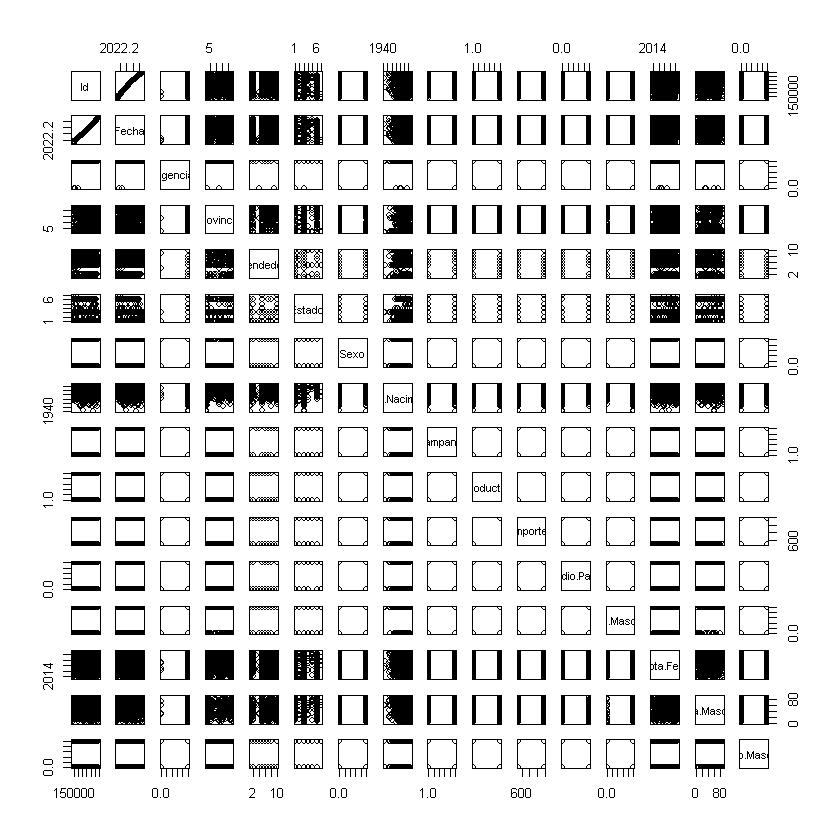

In [18]:
plot(mascotasFiltradas)

In [19]:
mascotasFiltradas[4:6,]

,Id,Fecha,Agencia,Provincia,Vendedor,Estado,Sexo,Fecha.Nacimiento,Campania,Producto,Importe,Medio.Pago,Tipo.Mascota,Mascota.Fec.Nac,Raza.Mascota,Sexo.Mascota
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
8079,147263,2022.095,1,2,5,1,0,1995.048,1,1,575,0,0,2016.188,60,1
8080,147299,2022.097,1,13,2,1,0,1997.656,1,2,744,0,1,2017.530,60,0
8081,147346,2022.097,1,1,5,5,0,1998.067,1,1,575,1,1,2021.462,11,0


Claramente un plot así nomás no me aporta información. Tenemos que ser más inteligentes y ver otras cosas. Veamos primero un poco de información de color.

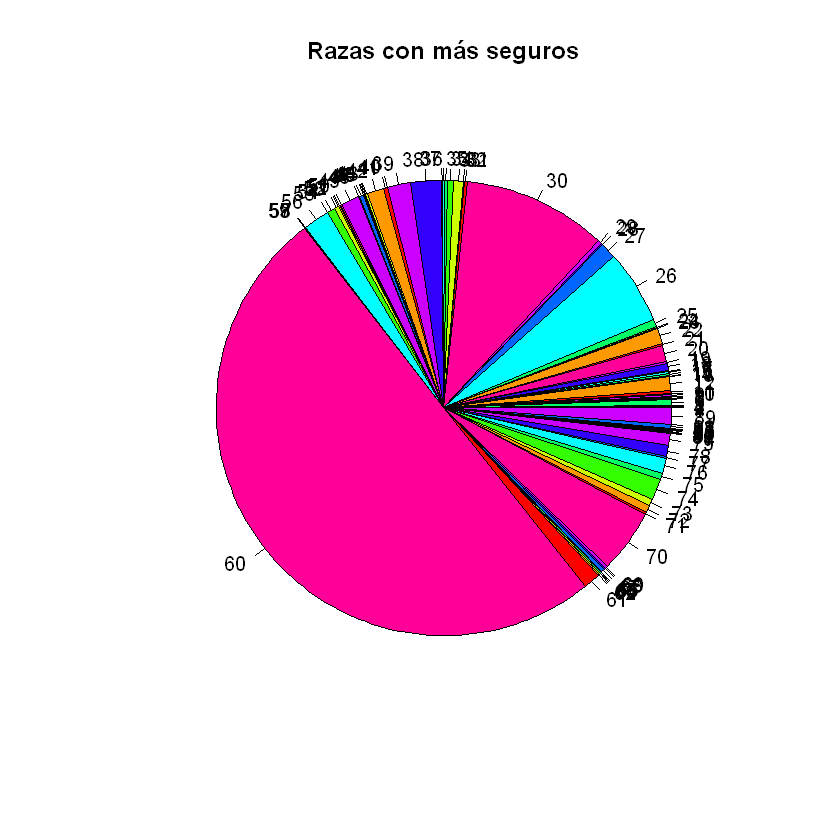

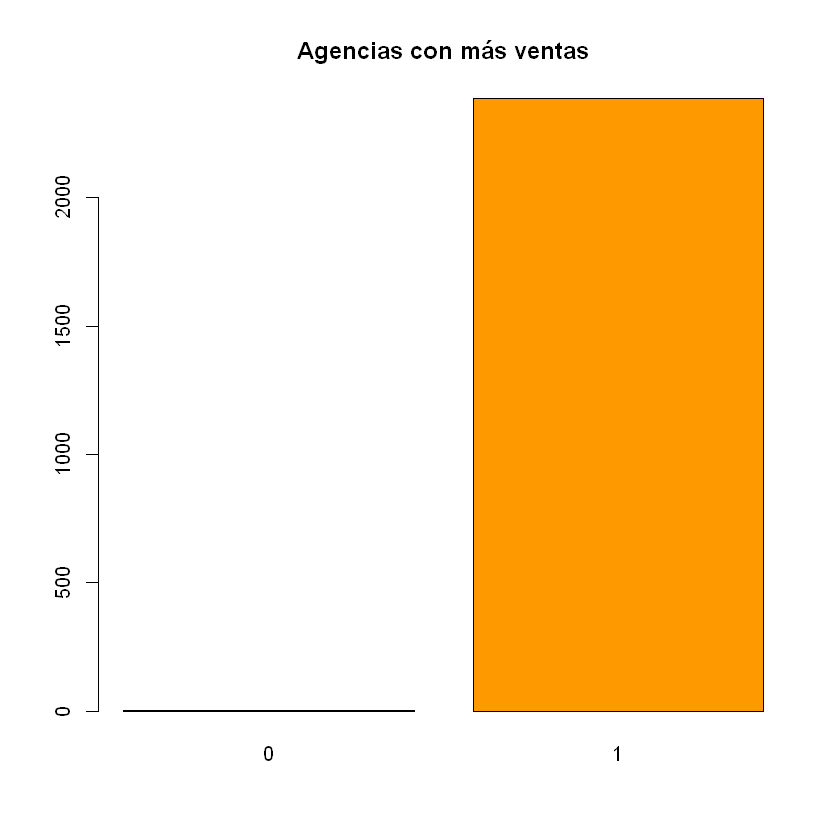

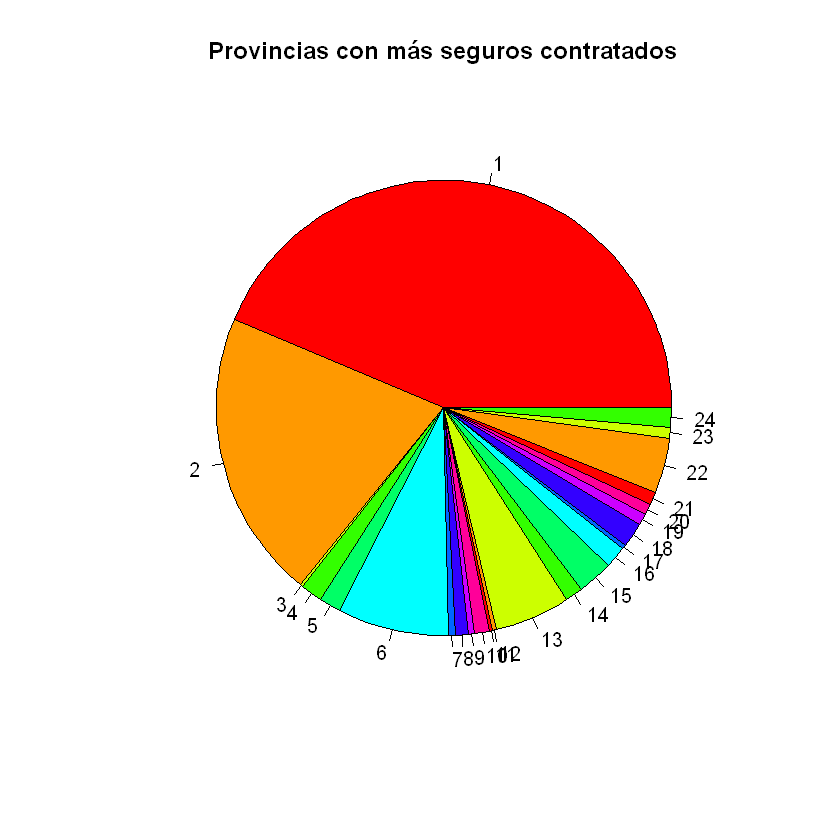

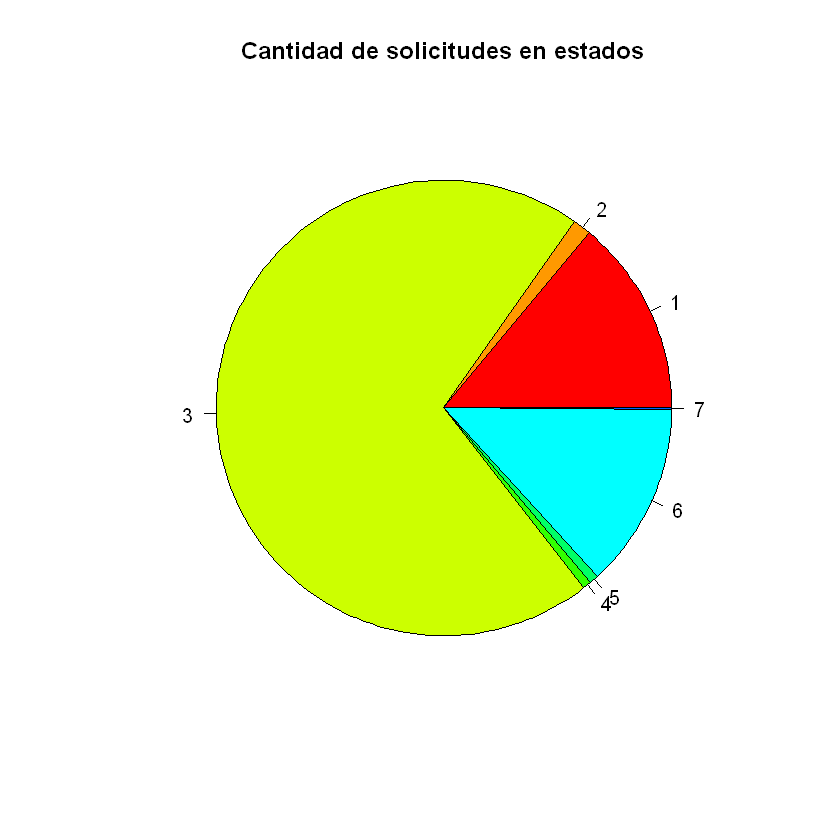

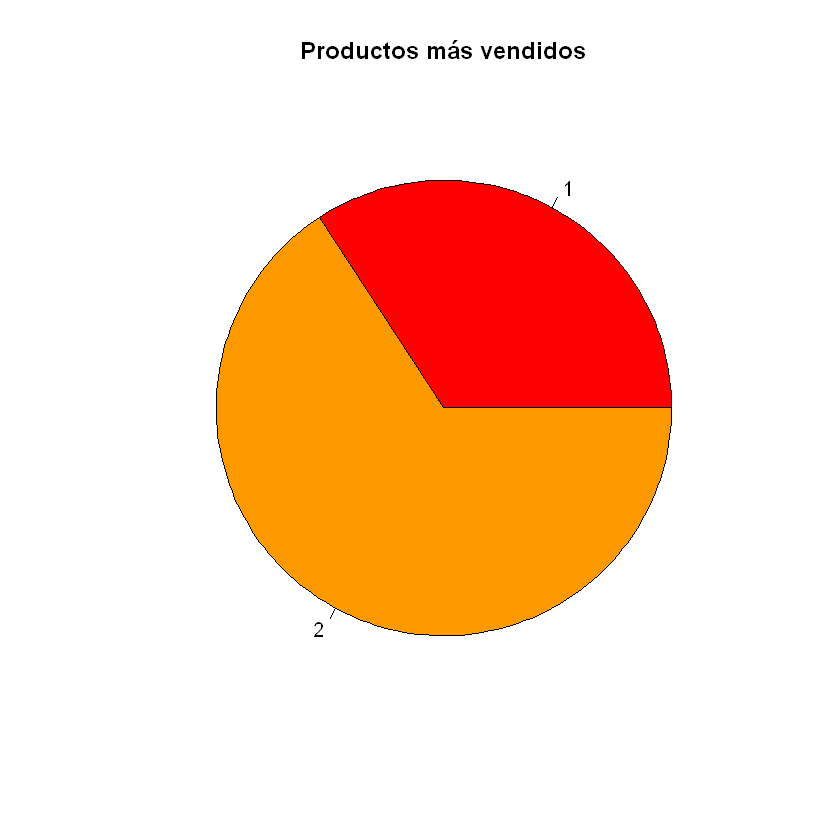

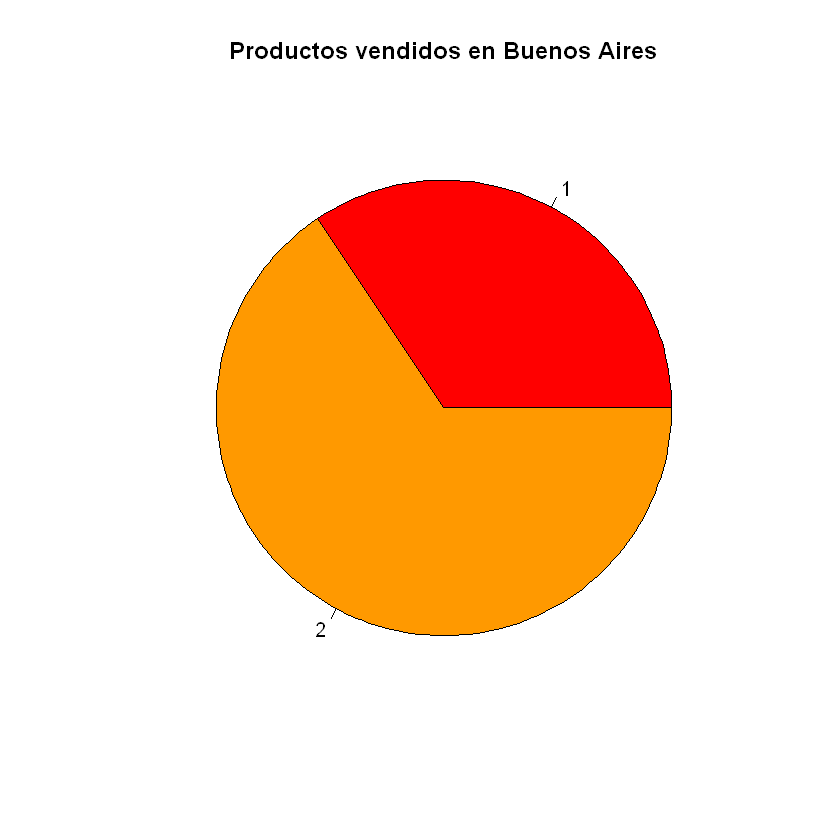

In [20]:
#Pie chart of razas
pie(table(mascotasFiltradas$Raza), main = "Razas con más seguros", col = rainbow(10))
# #Barplot of agencias
barplot(table(mascotasFiltradas$Agencia), main = "Agencias con más ventas", col = rainbow(10))
# #Piechart of provincias
pie(table(mascotasFiltradas$Provincia), main = "Provincias con más seguros contratados", col = rainbow(10))
#Pie cahrt of estados
pie(table(mascotasFiltradas$Estado), main = "Cantidad de solicitudes en estados", col = rainbow(10))
# #Pie chart of producto
pie(table(mascotasFiltradas$Producto), main = "Productos más vendidos", col = rainbow(10))
# #Pie chart of producto sold in buenos aires
pie(table(mascotasFiltradas$Producto[mascotasFiltradas$Provincia == 1]), main = "Productos vendidos en Buenos Aires", col = rainbow(10))

In [21]:
colnames(mascotasFiltradas)

[1] "Id"               "Fecha"            "Agencia"          "Provincia"       
 [5] "Vendedor"         "Estado"           "Sexo"             "Fecha.Nacimiento"
 [9] "Campania"         "Producto"         "Importe"          "Medio.Pago"      
[13] "Tipo.Mascota"     "Mascota.Fec.Nac"  "Raza.Mascota"     "Sexo.Mascota"

Voy a probar algunas combinaciones de variables a ver si me dan información de cómo determinar el estado de la solicitud. Va a ser difícil porque es toda información categórica, pero vamos a ver qué pasa.   

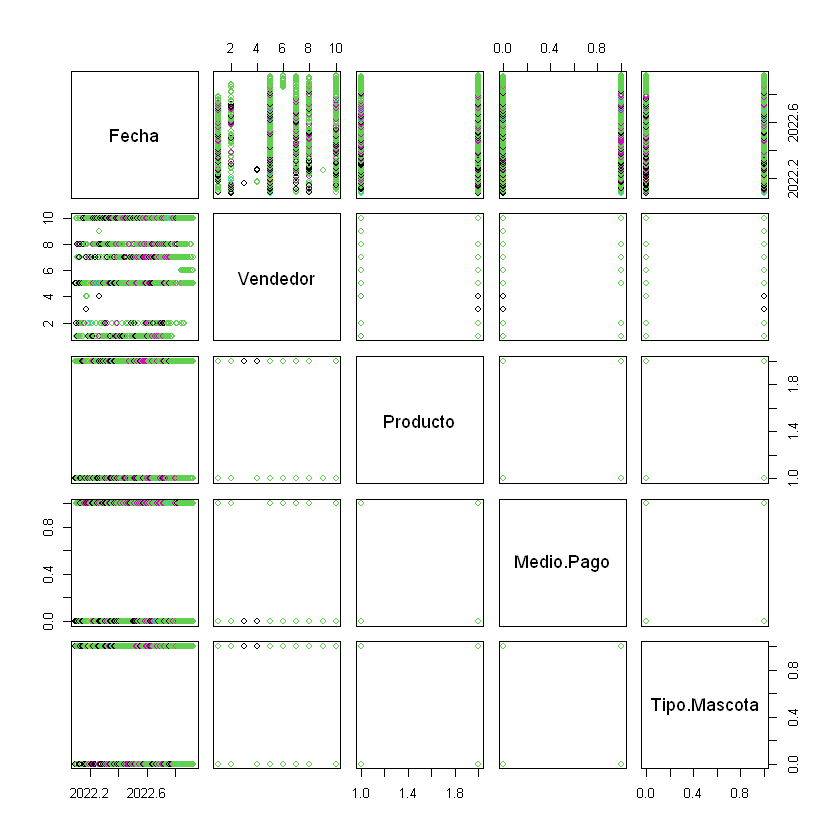

In [22]:
variables.mascotas.1 <- mascotasFiltradas[,c("Fecha", "Vendedor", "Producto", "Medio.Pago", "Tipo.Mascota")]
plot(variables.mascotas.1, col = mascotasFiltradas$Estado)

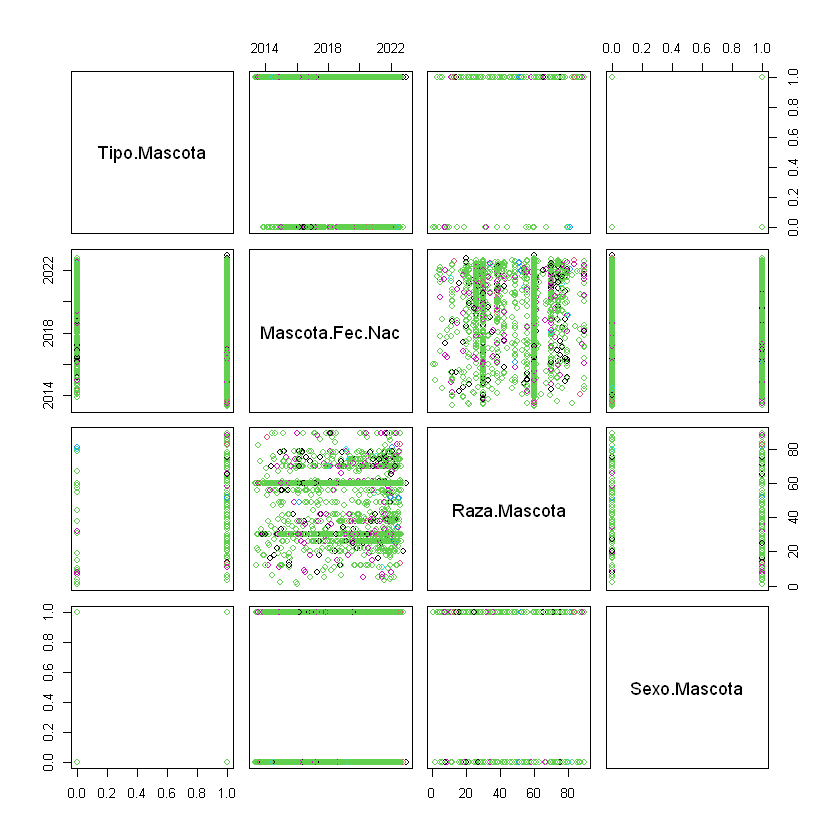

In [23]:
variables.mascotas.2 <- mascotasFiltradas[,c('Tipo.Mascota','Mascota.Fec.Nac','Raza.Mascota','Sexo.Mascota')]
plot(variables.mascotas.2, col = mascotasFiltradas$Estado)

Cruzándolo con la fecha de nacimiento de la mascota parece haber algo prometedor.

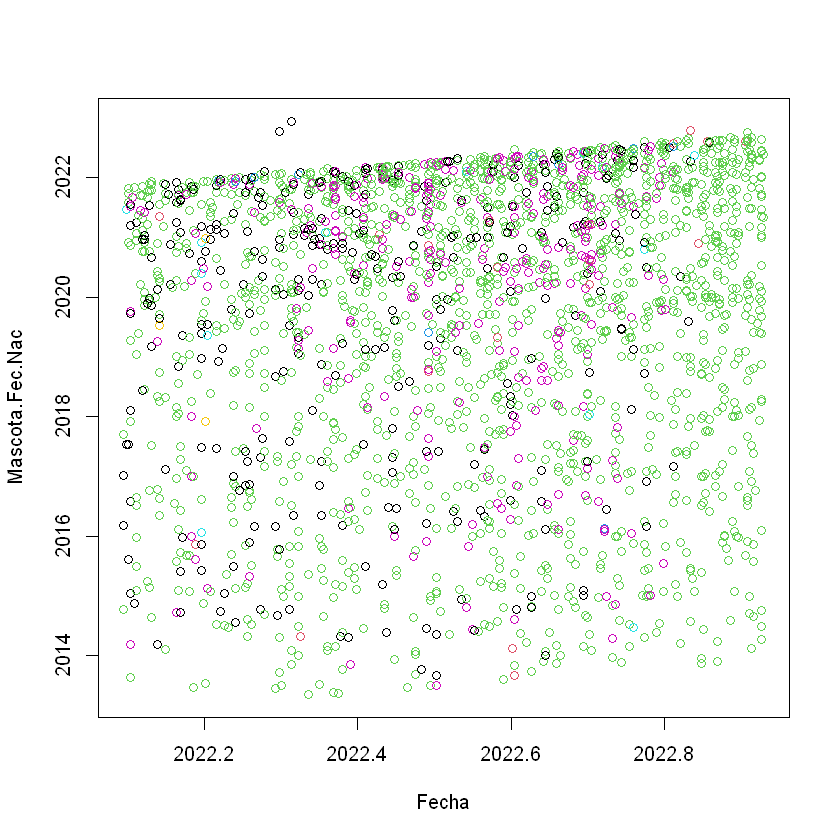

In [24]:
variables.mascotas.3 <- mascotasFiltradas[,c('Fecha','Mascota.Fec.Nac')]
plot(variables.mascotas.3, col = mascotasFiltradas$Estado)

Parece que las solicitudes más nuevas son las que más aceptadas son.

Veamos qué pasa con una PCA


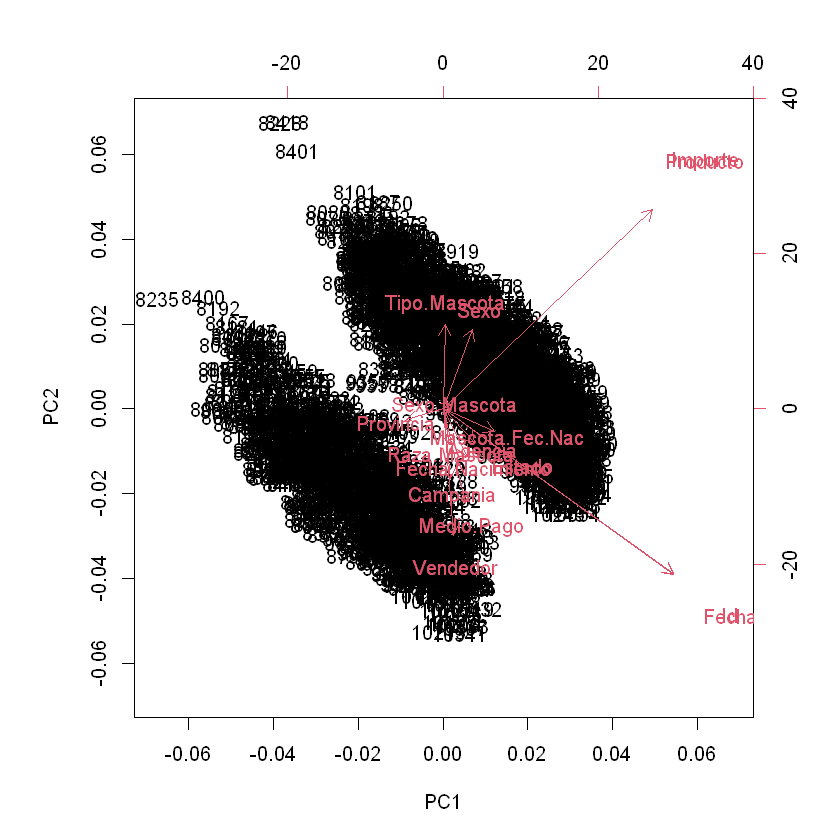

In [25]:
pca.mascotas <- prcomp(mascotasFiltradas, scale = TRUE)
biplot(pca.mascotas)

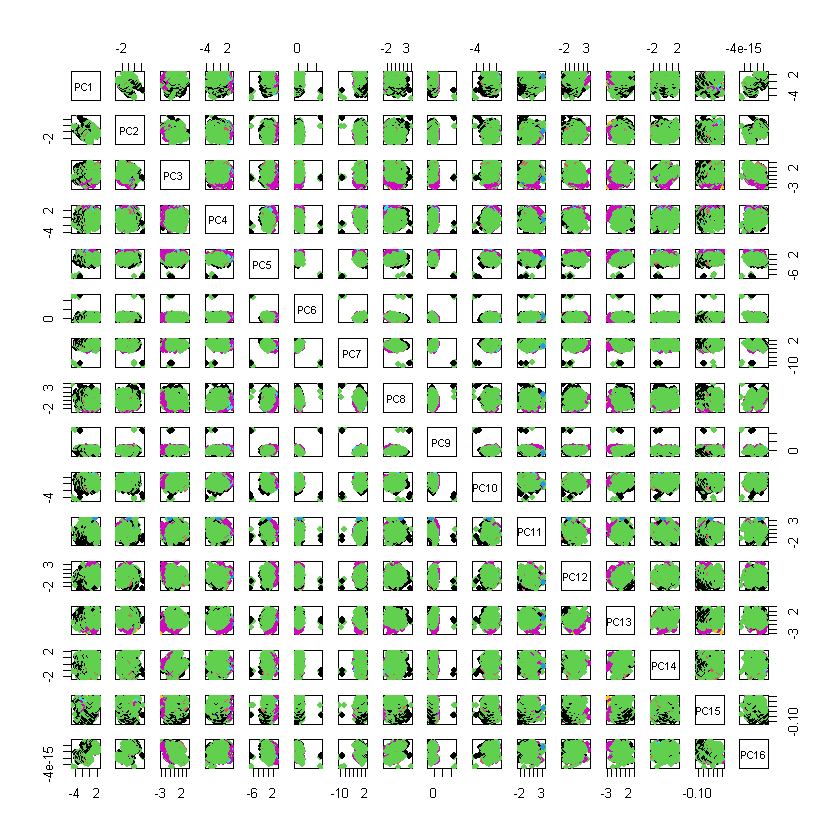

In [26]:
#Plot PCA
plot(as.data.frame(pca.mascotas$x), col = mascotasFiltradas$Estado, pch = 20, cex = 1.5)

Parece que encontramos relaciones interesantes!!!

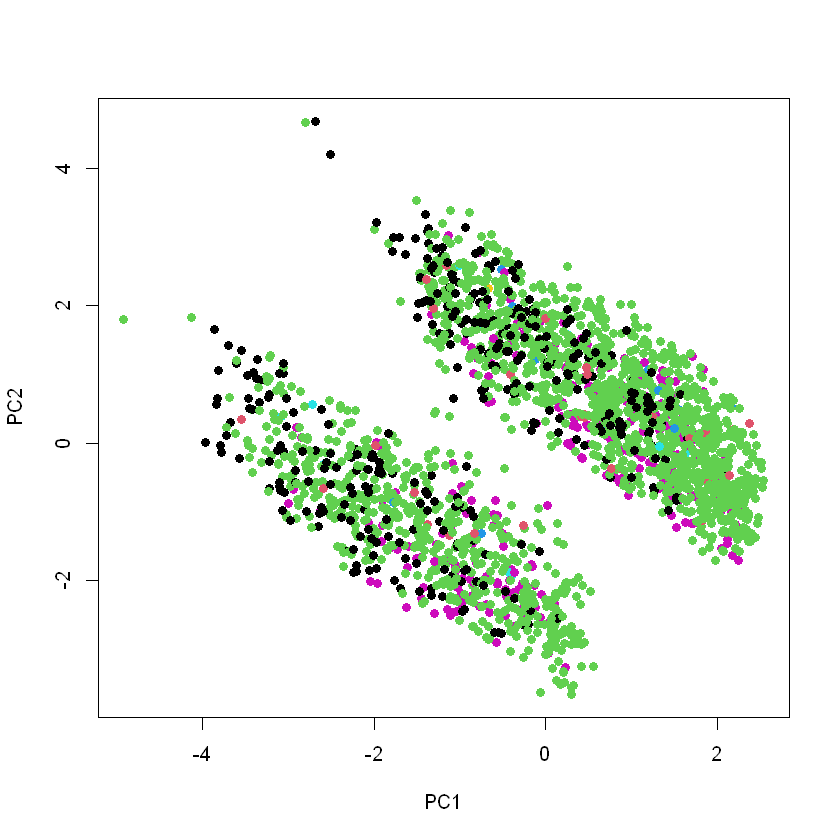

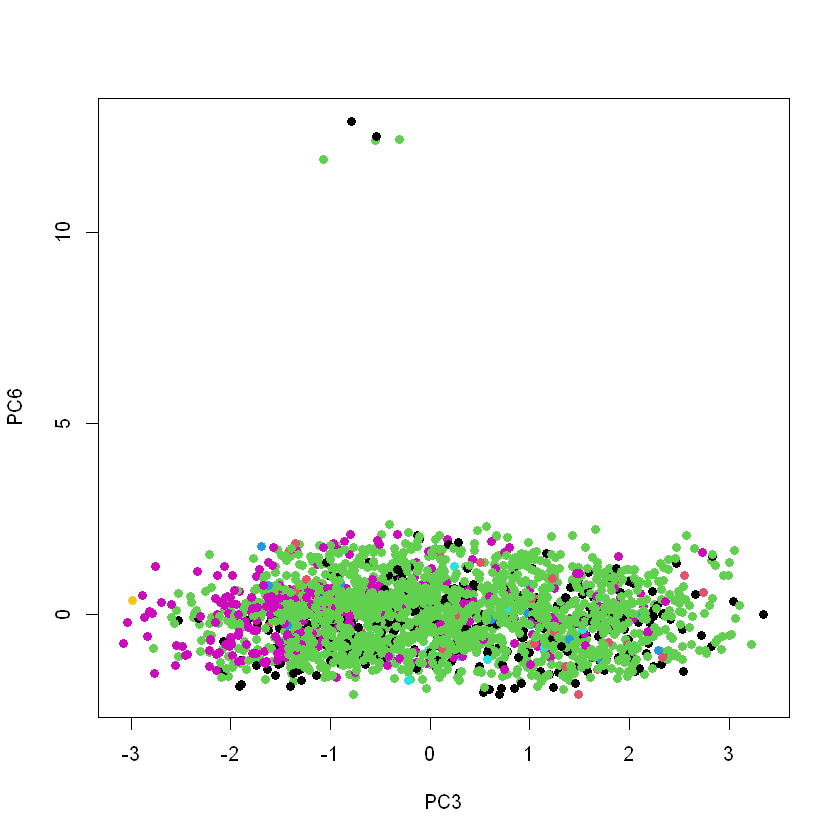

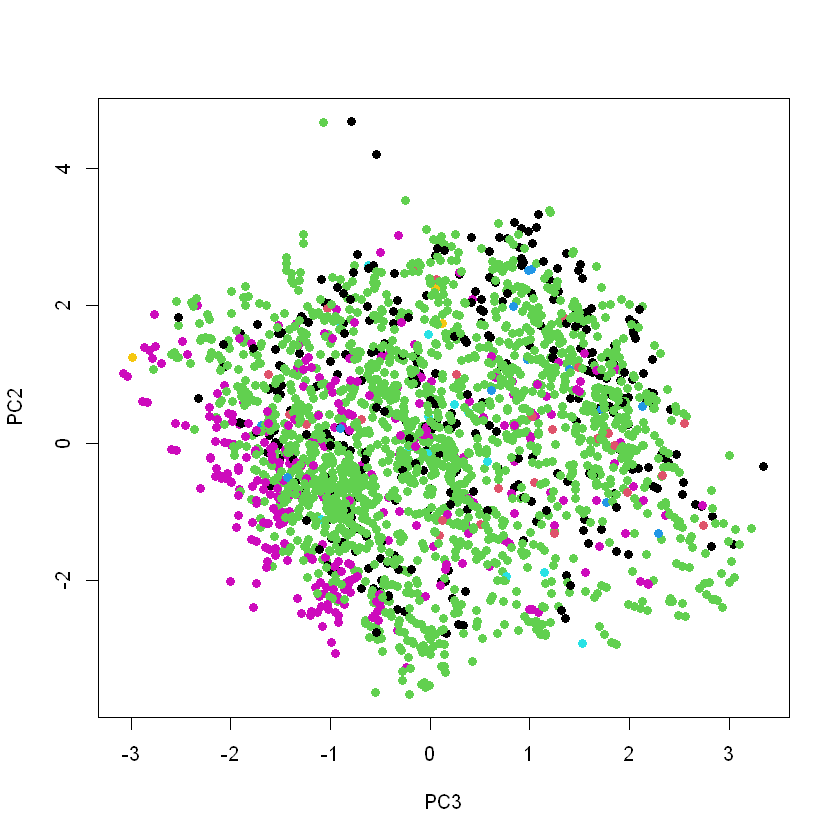

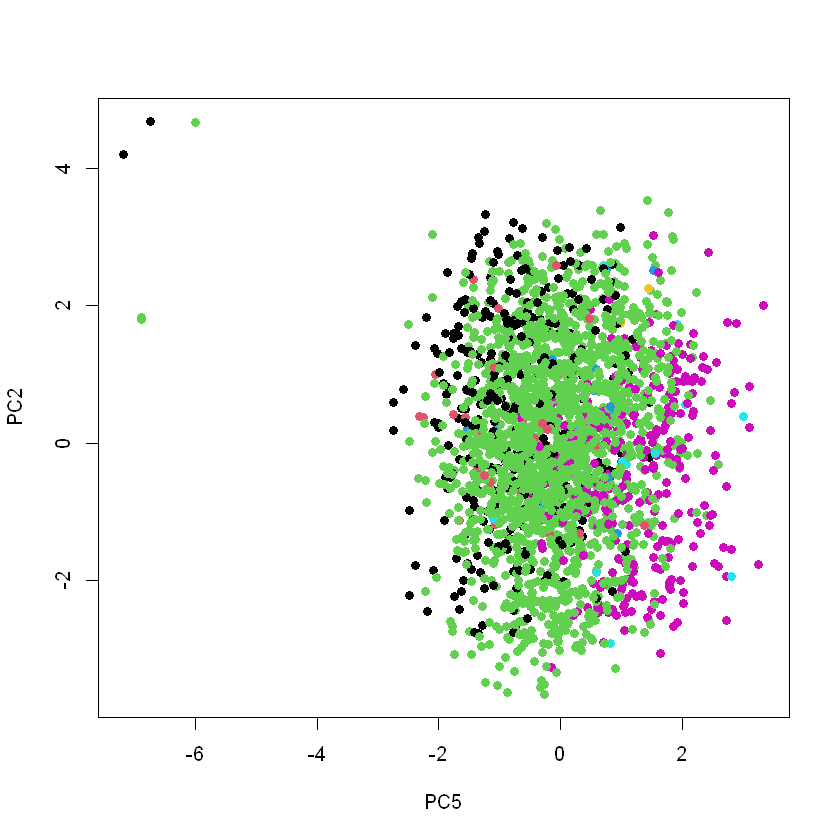

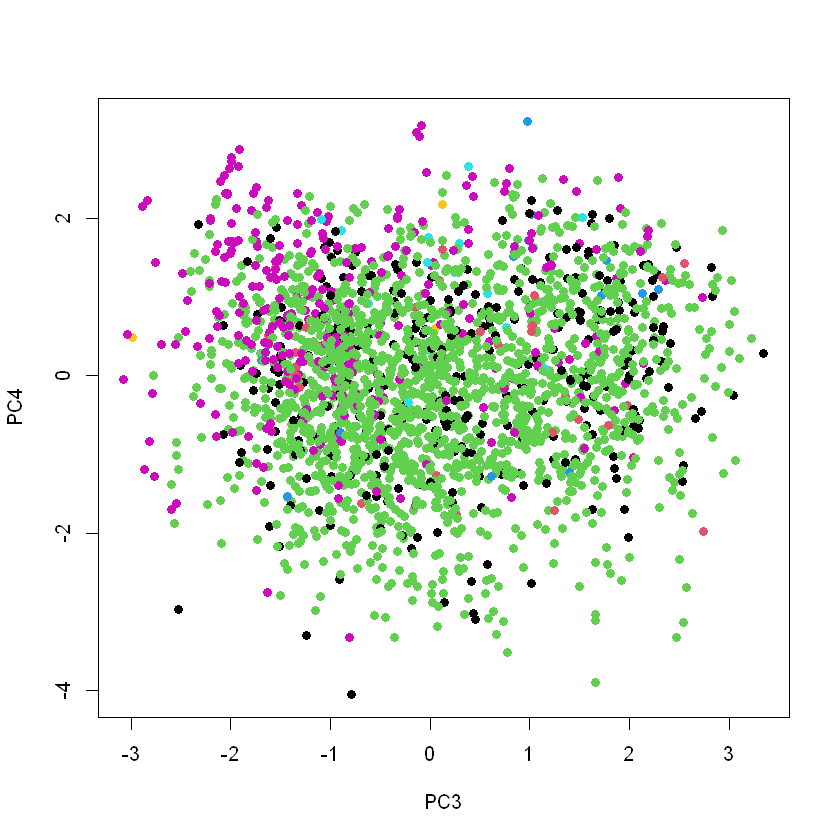

In [27]:
plot(pca.mascotas$x[,1:2], col = mascotasFiltradas$Estado, pch = 20, cex = 1.5)
plot(pca.mascotas$x[,c(3,6)], col = mascotasFiltradas$Estado, pch = 20, cex = 1.5)
plot(pca.mascotas$x[,c(3,2)], col = mascotasFiltradas$Estado, pch = 20, cex = 1.5)
plot(pca.mascotas$x[,c(5,2)], col = mascotasFiltradas$Estado, pch = 20, cex = 1.5)
plot(pca.mascotas$x[,c(3,4)], col = mascotasFiltradas$Estado, pch = 20, cex = 1.5)

Parecería ser que hay algunas solicitudes que se comportan como outliers

Vamos a ver ahora qué podemos hacer con la selacción de variables. Voy a buscar todo el código del TP 2


In [28]:
install.packages("randomForest", dependencies = T)
library(randomForest)
install.packages("kernlab", dependencies = T)
library(kernlab)

package 'randomForest' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'randomForest'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying D:\R-4.2.1\library\00LOCK\randomForest\libs\x64\randomForest.dll to D:\R-4.2.1\library\randomForest\libs\x64\randomForest.dll: Permission denied"
Warning message:
"restored 'randomForest'"



The downloaded binary packages are in
	C:\Users\Agustin\AppData\Local\Temp\RtmpoZUS8E\downloaded_packages


Warning message:
"package 'randomForest' was built under R version 4.2.2"
randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.



package 'kernlab' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'kernlab'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying D:\R-4.2.1\library\00LOCK\kernlab\libs\x64\kernlab.dll to D:\R-4.2.1\library\kernlab\libs\x64\kernlab.dll: Permission denied"
Warning message:
"restored 'kernlab'"



The downloaded binary packages are in
	C:\Users\Agustin\AppData\Local\Temp\RtmpoZUS8E\downloaded_packages


In [29]:
#---------------------------------------------------------------------------
#random forest error estimation (OOB) for greedy search
#---------------------------------------------------------------------------
rf.est <- function(x.train,y,equalize.classes=TRUE,tot.trees=500,mtry=0)
{
	if(mtry<1) mtry<-floor(sqrt(dim(x.train)[2]))
	prop.samples<-table(y)
	if(equalize.classes) prop.samples<-rep(min(prop.samples),length(prop.samples))
	return( randomForest(x.train,y,mtry=mtry,ntree=tot.trees,sampsize=prop.samples)$err.rate[tot.trees] )
}


#---------------------------------------------------------------------------
#random forest ranking method for rfe.
#---------------------------------------------------------------------------
imp.rf <- function(x.train,y,equalize.classes=TRUE,tot.trees=500,mtry=0)
{
	if(mtry<1) mtry<-floor(sqrt(dim(x.train)[2]))
	prop.samples<-table(y)
	if(equalize.classes) prop.samples<-rep(min(prop.samples),length(prop.samples))
	
	m.rf<-randomForest(x.train,y,ntree=tot.trees,mtry=mtry,sampsize=prop.samples,importance=TRUE)
	imp.mat<-importance(m.rf)
	imp.col<-dim(imp.mat)[2]-1
	rank.list<-sort(imp.mat[,imp.col],decreasing=FALSE,index=T)
	return(list(feats=rank.list$ix,imp=rank.list$x))
}

forward.ranking <- function(x,y,method,verbosity=0,... )
{

	max.feat<-dim(x)[2] #Cantidad de variables (digamosle k)
	num.feat<-1 #Cantidad inicial de variables
	list.feat<-1:max.feat #Sequencia de 1 a k donde guardo las variables mas importantes

	#ranking inicial: elijo la variable con menor error de prediccion
  x.train<-matrix(0,dim(x)[1],1) #Columna de 0 de tamaño n 
	class.error<-double(max.feat) #Aca voy a guardar todos los errores
	#para cada i, creo el dataset con esa variable sola, entreno un modelo y le mido el error, que lo guardo en class.error[i]
	for(i in 1:max.feat){
		x.train[,1]<-x[,i] #Lleno la variable donde guardo los datos de train con la columna de la variable que me importa
		class.error[i] <- do.call(method, c(list(as.matrix(x.train), y), list(...)) ) # Entreno un modelo y guardo el error
	}
	#guardo la variable con minimo error como primera. Guardo una lista keep.feat con las que me quedan para seguir eligiendo.
	list.feat[1]<-which.min(class.error) #Aca quedan ordenadas por importancia
	keep.feat<-sort(class.error,decreasing=FALSE,index=T)$ix[-1] #Aca quedan las que tengo que probar
	#armo un dataset con las variables que ya elegi, para ir agregando en cada paso.
	x.prev<-x.train[,1]<-x[,list.feat[1]] #En x.train pongo la variable importante como columna, y guardo esa columna como variable en x.prev

	if(verbosity>1) cat("\nFirst feature: ",list.feat[1],"\n")

    #loop principal. A cada paso agrego todas las variables disponibles, de a una, le mido el error y me quedo con la de minimo error. Hasta llegar a meter todas.
	while(num.feat<max.feat){
    #class.error guarda el error de cada modelo. Son max.feat-num.feat modelos.
		class.error<-double(max.feat-num.feat) #Voy sacando features
		#para cada variable que me queda, la agrego al dataset del paso anterior, entreno el modelo y le mido el error.
		for(i in 1:(max.feat-num.feat)){
			x.train<-cbind(x.prev,x[,keep.feat[i]]) #En x.prev estaban las variables que me servian, le agrego como columna la nueva variable 
			class.error[i] <- do.call(method, c(list(as.matrix(x.train), y), list(...)) )
		}
		if(verbosity>2) cat("\nFeatures:\n",keep.feat,"\nErrors:\n",class.error)
		#me quedo con el modelo de minimo error, guardo ese feature en la lista de las elegidas, lo saco de la lista de las que quedan, y actualizo el dataset de partida de la iteracion.
		best.index<-which.min(class.error)
		list.feat[num.feat+1]<-keep.feat[best.index]
		if(verbosity>1) cat("\n---------\nStep ",1+num.feat,"\nFeature ",best.index)

		keep.feat<-keep.feat[-best.index]
		if(verbosity>2) cat("\nNew search list: ",keep.feat)
		num.feat<-num.feat+1
		x.prev<-x[,list.feat[1:num.feat]] #Como en list.feat estaban las que me servian, ordenadas, las guardo en x.prev
	}

	search.names<-colnames(x)[list.feat]
	#le asigno a cada feature una importacia proporcional al orden en que lo seleccionamos
	imp<-(max.feat:1)/max.feat
	names(imp)<-search.names

	if(verbosity>1){
		cat("\n---------\nFinal ranking ",num.feat," features.")
		cat("\nFeatures: ",search.names,"\n")
	}

 	return( list(ordered.names.list=search.names,ordered.features.list=list.feat,importance=imp) )

}

backward.ranking <- function(x,y,method,... )
{

	max.feat<-dim(x)[2] #Cantidad de variables (digamosle k)
	list.feat<-1:max.feat #Sequencia de 1 a k donde guardo las variables mas importantes
	num.feat<-0 #Cantidad de variables que saque (ninguna)
	keep.feat <- 1:max.feat #Guardo las variables que me van quedando

	#ranking inicial: entreno un modelo completo y le mido el error
  x.train<-x #El primer entrenamiento se hace con todo el dataset
	previous.error <- do.call(method, c(list(as.matrix(x.train), y), list(...)) ) # Entreno un modelo completo y guardo el error

    class.error<-double(max.feat)
    for(i in 1:max.feat){
		x.train<-x[,-i] #En la primer iteracion saco una sola variable
		class.error[i] <- do.call(method, c(list(as.matrix(x.train), y), list(...)) )
        class.error[i] <- abs(class.error[i] - previous.error) #Diferencia con el error anterior
    }


	#Saco la variable que menos error me agrego (no era tan importante). Guardo una lista keep.feat con las que me quedan para seguir sacando.
	min.error.index <- which.min(class.error) #La que menor error deja es la menos importante (no afecto que la saque) 
    previous.error <- class.error[min.error.index] #El modelo adecuado es este
    list.feat[1]<-min.error.index #Aca quedan ordenadas por menor importancia
	keep.feat<-keep.feat[-min.error.index] #Aca quedan las que tengo que probar
	#Saco del dataset las variables que ya probe
    num.feat<-num.feat+1

    #loop principal. A cada paso saco variables, de a una, le mido el error y elimino la de minimo error. Hasta que me quede la mas importante.
	while(num.feat < max.feat -1 ){
    #class.error guarda el error de cada modelo. Son max.feat-num.feat modelos.
		class.error<-double(max.feat-num.feat) #Voy sacando features
		#para cada variable que me queda, la saco del dataset, entreno el modelo y le mido el error.
		for(i in 1:(max.feat-num.feat)){
			x.train<-x[,keep.feat[-i]] #Construyo el conjunto de train usando las feats que me interesan
			class.error[i] <- do.call(method, c(list(as.matrix(x.train), y), list(...)) )
			class.error[i] <- abs(class.error[i] - previous.error) #Diferencia con el error anterio
		}
		#me quedo con el modelo de minimo error, guardo ese feature en la lista de las elegidas, lo saco de la lista de las que quedan, y actualizo el dataset de partida de la iteracion.
		min.error.index<-which.min(class.error)
		previous.error <- class.error[min.error.index]
		list.feat[num.feat+1]<-keep.feat[min.error.index]
		keep.feat<-keep.feat[-min.error.index]

		num.feat<-num.feat+1
	}

	list.feat[num.feat+1] <- keep.feat[1] #Me quedaba una feature sin probar
	list.feat <- rev(list.feat) #Las variables mas importantes quedaron al final de la lista
	search.names<-colnames(x)[list.feat]
	#le asigno a cada feature una importacia proporcional al orden en que lo seleccionamos
	imp<-(max.feat:1)/max.feat
	names(imp)<-search.names

 	return( list(ordered.names.list=search.names,ordered.features.list=list.feat,importance=imp) )

}

no.parametrico <- function(x,y){
  var.count <- dim(x)[2]
  stat <- c()
  for (i in 1:var.count){
    var<-x[,i]
    stat[i] <- kruskal.test(var,y)$statistic
  }
  ordered.vars <- order(stat, decreasing=T) 
  var.names<-colnames(x)[ordered.vars]
  imp<-(var.count:1)/var.count
	names(imp)<-var.names
  return( list(ordered.names.list=var.names,ordered.features.list=ordered.vars,importance=imp) )

}

rfe <- function(x,y,method,...){
  p <- dim(x)[2]
  F <- 1:p #Todas mis variables
  R <- c()
  for(i in 1:p){
    #Truco que me sirvio para entender que estoy haciendo al construir el dataset de entrenamiento:
    #F es una lista de indices (guarda todas las variables que voy a usar)
    #En lugar de hacer algun truco raro para llevar registro de que voy eliminando, reconstruyo el dataset de entrenamiento con los indices
    x.train <- as.matrix(x[,F]) #Tengo que pasarlo a matrix porque sino tengo problemas con las dimensiones
    values <- do.call(method, c(list(x.train, y), list(...)) ) 
    fIndex <- values$feats[1] #Obtengo la variable menos importante
    R[p-i+1] <- F[fIndex] #Agrego la variable menos importante
    F <- F[-fIndex] #Elimino la variable de mi lista de variables
  }
  var.names<-colnames(x)[R]
  imp<-(p:1)/p
	names(imp)<-var.names
  return( list(ordered.names.list=var.names,ordered.features.list=R,importance=imp) )

}

Vamos a hacer los análisis usando Random Forest

In [31]:
#Estado es la columna 6, tambien vamos a ignorar el ID
mascotasFiltradas[,6] <- as.factor(mascotasFiltradas[,6])
FORW.rf <-forward.ranking(mascotasFiltradas[,-c(6,1)],mascotasFiltradas[,6],method="rf.est" ,tot.trees=100,equalize.classes=F)
BACK.rf <-backward.ranking(mascotasFiltradas[,-c(6,1)],mascotasFiltradas[,6],method="rf.est" ,tot.trees=100,equalize.classes=F)
noP <- no.parametrico(mascotasFiltradas[,-c(6,1)],mascotasFiltradas[,6])
RFE.rf <- rfe(mascotasFiltradas[,-c(6,1)],mascotasFiltradas[,6],method="imp.rf",tot.trees=100,equalize.classes=F)

In [ ]:
FORW.rf
BACK.rf
noP 
RFE.rf

$ordered.names.list
 [1] "Sexo"             "Campania"         "Producto"         "Fecha.Nacimiento"
 [5] "Fecha"            "Provincia"        "Vendedor"         "Medio.Pago"      
 [9] "Importe"          "Tipo.Mascota"     "Raza.Mascota"     "Agencia"         
[13] "Mascota.Fec.Nac"  "Sexo.Mascota"    

$ordered.features.list
 [1]  5  7  8  6  1  3  4 10  9 11 13  2 12 14

$importance
            Sexo         Campania         Producto Fecha.Nacimiento 
      1.00000000       0.92857143       0.85714286       0.78571429 
           Fecha        Provincia         Vendedor       Medio.Pago 
      0.71428571       0.64285714       0.57142857       0.50000000 
         Importe     Tipo.Mascota     Raza.Mascota          Agencia 
      0.42857143       0.35714286       0.28571429       0.21428571 
 Mascota.Fec.Nac     Sexo.Mascota 
      0.14285714       0.07142857

$ordered.names.list
 [1] "Fecha.Nacimiento" "Fecha"            "Provincia"        "Vendedor"        
 [5] "Producto"         "Sexo"             "Importe"          "Tipo.Mascota"    
 [9] "Sexo.Mascota"     "Campania"         "Agencia"          "Raza.Mascota"    
[13] "Mascota.Fec.Nac"  "Medio.Pago"      

$ordered.features.list
 [1]  6  1  3  4  8  5  9 11 14  7  2 13 12 10

$importance
Fecha.Nacimiento            Fecha        Provincia         Vendedor 
      1.00000000       0.92857143       0.85714286       0.78571429 
        Producto             Sexo          Importe     Tipo.Mascota 
      0.71428571       0.64285714       0.57142857       0.50000000 
    Sexo.Mascota         Campania          Agencia     Raza.Mascota 
      0.42857143       0.35714286       0.28571429       0.21428571 
 Mascota.Fec.Nac       Medio.Pago 
      0.14285714       0.07142857

$ordered.names.list
 [1] "Fecha"            "Medio.Pago"       "Fecha.Nacimiento" "Campania"        
 [5] "Mascota.Fec.Nac"  "Producto"         "Importe"          "Sexo"            
 [9] "Raza.Mascota"     "Vendedor"         "Provincia"        "Tipo.Mascota"    
[13] "Sexo.Mascota"     "Agencia"         

$ordered.features.list
 [1]  1 10  6  7 12  8  9  5 13  4  3 11 14  2

$importance
           Fecha       Medio.Pago Fecha.Nacimiento         Campania 
      1.00000000       0.92857143       0.85714286       0.78571429 
 Mascota.Fec.Nac         Producto          Importe             Sexo 
      0.71428571       0.64285714       0.57142857       0.50000000 
    Raza.Mascota         Vendedor        Provincia     Tipo.Mascota 
      0.42857143       0.35714286       0.28571429       0.21428571 
    Sexo.Mascota          Agencia 
      0.14285714       0.07142857

$ordered.names.list
 [1] "Fecha"            "Fecha.Nacimiento" "Medio.Pago"       "Vendedor"        
 [5] "Provincia"        "Sexo"             "Importe"          "Tipo.Mascota"    
 [9] "Campania"         "Producto"         "Mascota.Fec.Nac"  "Raza.Mascota"    
[13] "Sexo.Mascota"     "Agencia"         

$ordered.features.list
 [1]  1  6 10  4  3  5  9 11  7  8 12 13 14  2

$importance
           Fecha Fecha.Nacimiento       Medio.Pago         Vendedor 
      1.00000000       0.92857143       0.85714286       0.78571429 
       Provincia             Sexo          Importe     Tipo.Mascota 
      0.71428571       0.64285714       0.57142857       0.50000000 
        Campania         Producto  Mascota.Fec.Nac     Raza.Mascota 
      0.42857143       0.35714286       0.28571429       0.21428571 
    Sexo.Mascota          Agencia 
      0.14285714       0.07142857

Todos los métodos coinciden en que la fecha de emisión de la solicitud es importante para determinar el estado. Esperaba que el medio de pago juege un rol importante, pero no parece ser así. Tampoco lo es la raza de la mascota, pero sí la fecha de nacimiento del que contrata el seguro.

En todos menos el test no paramétrico la provincia está entre los primeros 6. No me sorprende, porque la mayoría de las solicitudes cerradas son de Buenos Aires y de Capital Federal.

Pasemos ahora a buscar clusters. Recordemos lo hecho en el TP 3

In [32]:
#Funcion para generar n datasets con distribuciones uniformes para usar de referencia
crea.referencias <- function(original.dataset, n){
    #Dimensiones del dataset
    rows <- dim(original.dataset)[1]
    cols <- dim(original.dataset)[2]

    #Calculamos la pca
    pca <- prcomp(original.dataset)
    #Obtenemos los rangos de las variables, range me da el minimo y el maximo
    rangos <- apply(pca$x, 2, range)

    #Dataset de referencia, tiene que ser una lista para soportar las multiples dimensiones
    reference.datasets <- list()

    #Generamos los n datasets de referencia
    for(i in 1:n){
        #Generamos un dataset de referencia vacio
        reference.dataset <- c()

        #Generamos las columnas de uno de los datasets
        for(j in 1 : min(rows, cols)){
			    uniformColumn = runif(rows, rangos[1, j], rangos[2, j])
			    reference.dataset = cbind(reference.dataset, uniformColumn)
		    }	
        
        #Añadimos el dataset de referencia a la lista
        reference.datasets[[i]] <- reference.dataset
    }

    return (reference.datasets)
}


gap.statistic <- function(dataset, maxK, B){
    #Vector Wkb de las referencias
    Wkb.star <- double(maxK)
    #Vetor para almacenar el gap
    gap <- double(maxK)
    #Vector para las desviaciones estandar
    sk <- double(maxK)
    uniform.references <- crea.referencias(dataset, B)

    for(k in 1:maxK){
        #Medida de dispersion de cluster de tamaño k
        Wk <- kmeans(dataset, k, nsta = 10)$tot.withinss
        #Busco las medidas de dispersion de hacer kmeans de cada referencia
        for(b in 1:B){
            Wkb.star[b] <- kmeans(uniform.references[[b]],k)$tot.withinss
        }
        #Obtenemos la gap statistic
        gap[k] <- (1/B) * sum(log(Wkb.star)) - log(Wk)
        lhat <- (1/B) * sum(log(Wkb.star))
        sd.k <- sqrt(1/B * sum((log(Wkb.star) - lhat)^2))
        sk[k] <- sd.k * sqrt(1 + 1/B)
    }

    #Buscamos la cantidad de clusters adecuada según la desigualdad
    suggested.clusters <- 2
	  while(suggested.clusters < maxK && 
	      gap[suggested.clusters] < gap[suggested.clusters + 1] - sk[suggested.clusters + 1]){
          
		suggested.clusters = suggested.clusters + 1
	  }
    return(suggested.clusters)
}

#Funcion magica provista por Pablo Granitto
stability.score <- function(n, ind1, ind2, cc1, cc2){
    v1<-v2<-rep(0,n)
    v1[ind1]<-cc1+5
    v2[ind2]<-cc2+5
    #creo una matriz m con 1 donde los dos puntos estan en el mismo cluster, -1 en distinto cluster y 0 si alguno no esta, para cada clustering
    a <- sqrt(v1%*%t(v1))
    m1 <- a / -a + 2*(a==round(a))
    m1[is.nan(m1)]<- 0
    a <- sqrt(v2%*%t(v2))
    m2 <- a / -a + 2*(a==round(a))
    m2[is.nan(m2)] <- 0
    #calculo el score, los pares de puntos que estan en la misma situacion en los dos clustering dividido el total de pares validos.
    validos <- sum(v1*v2>0)
    score <- sum((m1*m2)[upper.tri(m1)]>0)/(validos*(validos-1)/2)
    return(score)
}

stability.method <- function(dataset, k, nRep){
    #Cantidad de filas
    rows <- dim(dataset)[1]

    #Generamos nRep muestras del dataset subsampleadas al 90%
    subsamples <- list()
    for(i in 1:nRep){
        subsamples[[i]] <- sample(rows, rows*0.9)
    }

    #Calculamos el valor de estabilidad segun la cantidad de clusters
    stability <- list()
    stability.mean <- c()
    for(cluster.number in 2:k){
        #Calculamos el clustering para cada subsample
        kmeans.subsamples <- list()
        for(r in 1:nRep){
            kmeans.subsamples[[r]] <- kmeans(dataset[subsamples[[r]], ], cluster.number)$cluster
        }

        #Calculamos la estabilidad comparando cada referencia creada
        stability.scores <- c()
        for(ind1 in 1 : (nRep - 1)){
            for(ind2 in (ind1 + 1) : nRep){
                stability.scores <- c(stability.scores, stability.score(rows, subsamples[[ind1]], subsamples[[ind2]], kmeans.subsamples[[ind1]], kmeans.subsamples[[ind2]]))
            }
        }
        stability[[cluster.number]] <- stability.scores
        #Sacamos la media de los scores de estabilidad para obtener la cantidad preferida de clusters (tambien se puede hacer viendo histogramas)
        stability.mean <- c(stability.mean, mean(stability.scores))
    }
    l <- list(stability = stability, mean.stability = stability.mean)
    return(l) 
}

In [33]:
gap <- gap.statistic(mascotasFiltradas[,-c(6,1)], 5, 1000)
stab <- stability.method(mascotasFiltradas[,-c(6,1)], 5, 10)

In [34]:
gap
stab

[1] 4

$stability
$stability[[1]]
NULL

$stability[[2]]
 [1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[39] 1 1 1 1 1 1 1

$stability[[3]]
 [1] 0.7699925 1.0000000 0.7655890 0.7634589 1.0000000 0.7643796 0.8451270
 [8] 1.0000000 0.7632134 0.7667988 1.0000000 1.0000000 0.7668663 1.0000000
[15] 0.7861836 0.7666669 1.0000000 0.7640632 0.7613253 1.0000000 0.7609799
[22] 0.8449422 1.0000000 0.7606861 1.0000000 0.7635954 1.0000000 0.7800484
[29] 0.7631928 1.0000000 0.7633067 1.0000000 0.7818274 0.7616932 1.0000000
[36] 0.7634596 0.8476941 1.0000000 0.7626193 0.7835330 0.7611538 1.0000000
[43] 0.8449681 0.7856953 0.7620985

$stability[[4]]
 [1] 0.7866603 0.7784709 0.8675845 0.7814924 0.7832125 0.7042528 0.7829068
 [8] 0.7013128 0.7139618 1.0000000 0.7897871 1.0000000 1.0000000 0.8650769
[15] 1.0000000 0.8619586 0.9256594 0.7871381 1.0000000 1.0000000 0.8643260
[22] 1.0000000 0.8617360 0.9271307 0.7859141 0.7860690 0.6526497 0.7878709
[29] 0.6481478 0.7162564 1.0000000 0.8644980 1.0000000 0.8616221 0.9254895
[36] 0.8653405 1.0000000 0.8631948 0.9267150 0.8637382 0.9967607 0.8956246
[43] 0.8616311 0.9260295 0.8928464

$stability[[5]]
 [1] 0.8186883 0.8062502 0.9589518 0.7957652 0.8868497 0.9644078 0.8845359
 [8] 0.9752376 0.8250039 0.9331888 0.8489250 0.6181998 0.9308257 0.8432739
[15] 0.9312248 0.8371343 0.9746101 0.8204338 0.6046891 0.9083221 0.8179334
[22] 0.9074479 0.8255749 0.9393026 0.7540799 0.8986204 0.9722875 0.8966601
[29] 0.9733641 0.8463370 0.6867689 0.7585852 0.6845005 0.7695083 0.6241170
[36] 0.8975215 1.0000000 0.9046413 0.9330486 0.8951028 0.9782898 0.8646792
[43] 0.9034787 0.9317018 0.8432453


$mean.stability
[1] 1.0000000 0.8572257 0.8645126 0.8594070

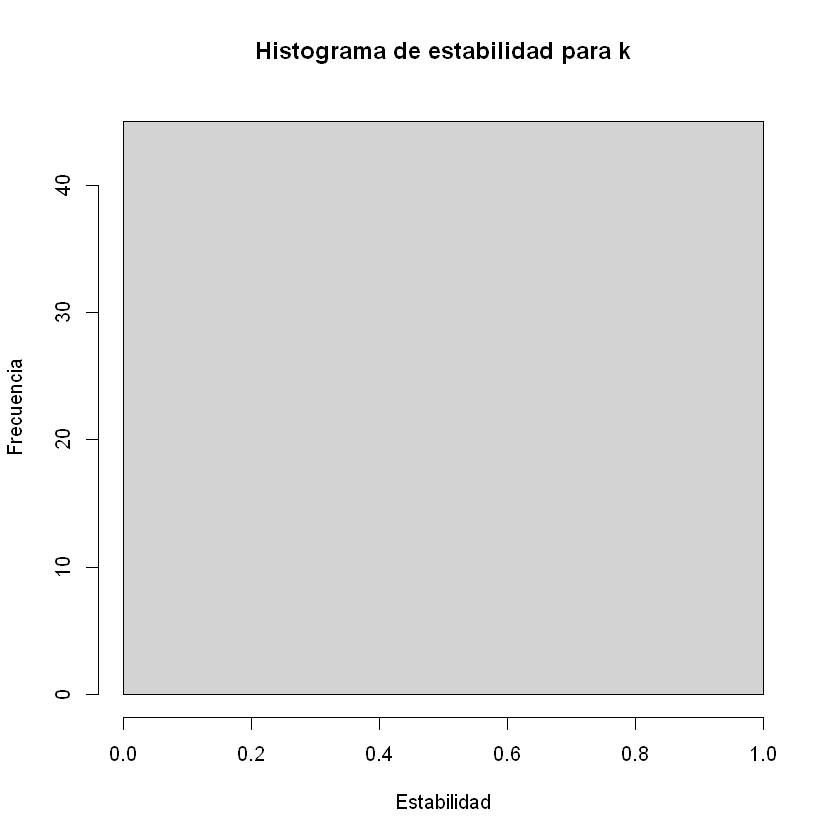

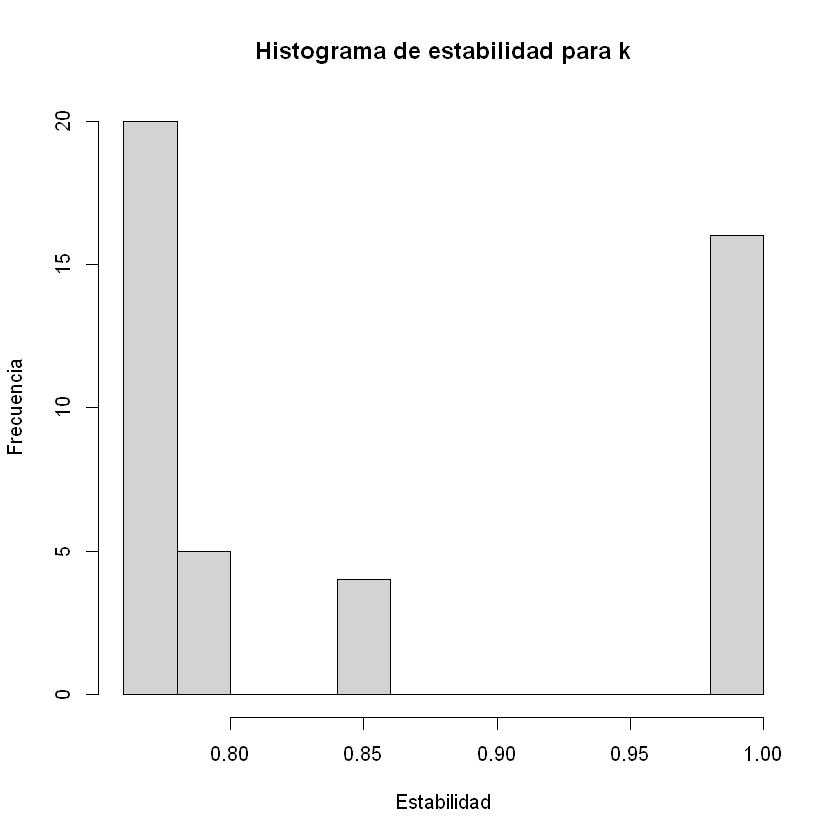

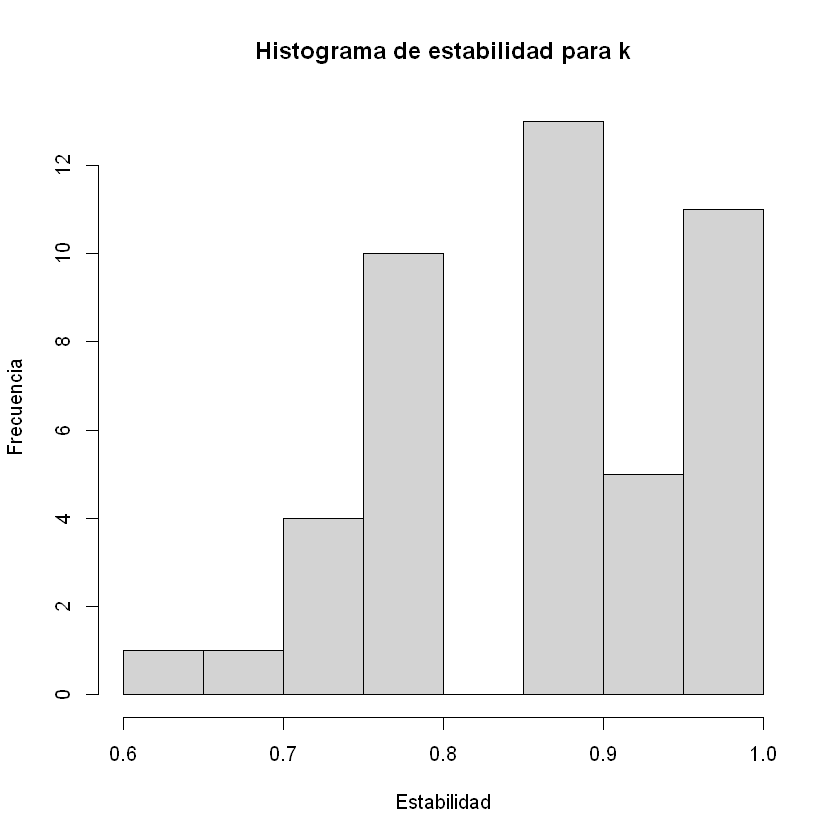

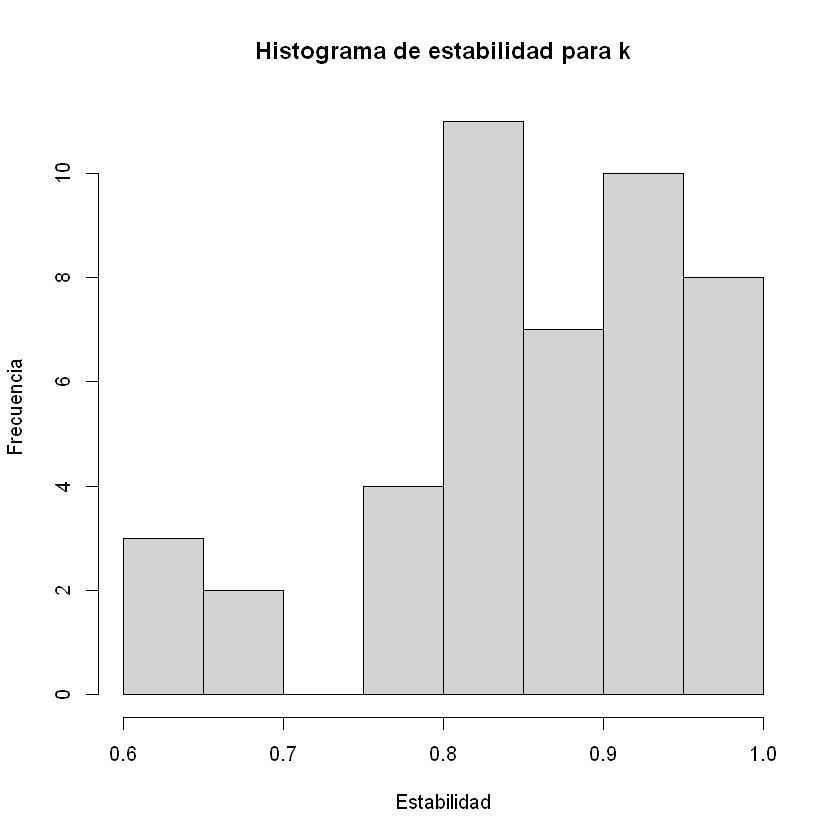

In [37]:
#Create a histogram based on stab$stability
for(k in 2:5){
hist(stab$stability[[k]], breaks = 10, main = "Histograma de estabilidad para k", xlab = "Estabilidad", ylab = "Frecuencia")
}